## SOcial ANalysis (SOAN)

**Goal**  
On 17 August 2018,I married the woman of my dreams. In order to know just how special she was (and is) to me I decided to put my data science skills to work. I analysed whatsapp data and all of our pictures that we made together. The end product was a small book that included results of this notebook with descriptions of all analyses that were done. I gave it to her the day before we married as to show what she means to me. 

**Project**  
The project started off with basic data analyses, namely getting means and sums of different statistics such as average number of words per message per user and eventually evolved into analyzing topics that were frequently discussed in the group chat. Personally, the most interesting analysis I have done in this project was using TF-IDF as a way to extract words that characterize each person in the group chat. It is interesting to see which words are often used by one person, but rarely by all others. 

Use the table of contents below to go to the analysis of your interest. 

## <a name="table">Table of Contents</a> 

1. [Functions](#functions)

2. [General Statistics](#general)  

    2.1 [Prepare Data](#gs-data)  
        
    2.2 [Users in the Group](#users)
    
    2.3 [Messages over time](#gs-messages)  
    
    2.4 [Active Moments](#gs-active) 
    
    2.5 [Averages / Summaries](#gs-averages) 
    
    2.6 [Response Time](#gs-response) 
    
3. [TF-IDF](#tfidf)  

    3.1 [Count Vector](#tf-count)  

    3.2 [Unique Words](#tf-unique)  

    3.3 [Plot Image](#tf-image)  

4. [Emoji Analysis](#emoji)  

    4.1 [Prepare Data](#emoji-prepare)  

    4.2 [Unique and Common Emojis](#emoji-stats)  

    4.3 [Correlation Matrix](#emoji-corr)  
    
5. [Topic Modelling](#topic)  

    5.1 [Prepare Data](#topic-prepare)  

    5.2 [LDA](#topic-lda)  

    5.3 [NMF](#topic-nmf)  
    
6. [Sentiment Analysis](#sentiment)  

    6.1 [Prepare Data](#sentiment-prepare)  

    6.2 [Average Sentiment](#sentiment-average)  
    
    6.3 [Plot Sentiment](#sentiment-plot)  
    
7. [Word Clouds](#cloud)  

    7.1 [Prepare Data](#cloud-prepare)  

    7.2 [Masked Word Cloud](#cloud-mask)  

    7.3 [Sentiment-based Word Cloud](#cloud-sentiment) 
    
8. [Color Analysis](#color)  

    8.1 [Extract Frequent Colors (k-Means)](#color-get)  

    8.2 [Plot Frequent Colors](#color-plot)  

## <a name="functions">1. Functions</a> 
[Back to Table of Contents](#table)

I purposefully imported all packages manually just to show you which are which and how they work. 

In [2]:
from soan.whatsapp import helper      # Helper to prepare the data
from soan.whatsapp import general     # General statistics
from soan.whatsapp import tf_idf      # To calculate TF-IDF
from soan.whatsapp import emoji       # To analyze emoji use
from soan.whatsapp import topic       # Topic modelling and summarization
from soan.whatsapp import sentiment   # Sentiment Analysis
from soan.whatsapp import wordcloud   # Create Word Clouds

from soan.colors   import colors      # Frequent Color Visualization

%matplotlib inline

## <a name="general">2. General Statistics</a> 
[Back to Table of Contents](#table)

Here you can find general data with regards to whatsapp conversations such as the number of messages and words. Keep in mind this is simply to get a general understanding of the conversations. More complex and interesting information can be found in the later chapters. 

#### <a name="gs-data">2.1 Prepare Data</a> 
[Back to Table of Contents](#table)

The data is preprocessed by loading in the raw txt file which is sent through whatsapp to your mail. The following columns are created:
* Message_Raw
    * The raw message for each user (including date and name of user)
* User
    * The user who has sent the message, if no users have sent that message
    then it is simply removed from the dataframe
* Message_Clean
    * Only containing the message, but with all possible symbols in there
    Thus, no date and no name of the user
* Message_Only_Text
    * Only text, lowercase
* Date
    * Date in the format y/m/d

In [3]:
df = helper.import_data('Whatsapp.txt')
df = helper.preprocess_data(df)

# Change labels for anonymization 
user_labels = {old: new for old, new in zip(sorted(df.User.unique()), ['Her', 'Me'])}
df.User = df.User.map(user_labels)

#### <a name="users">2.2 Users in the group</a> 
[Back to Table of Contents](#table)

In [4]:
general.print_users(df)

#############
##  Users  ##
#############

Her
Me


#### <a name="gs-messages">2.3 Messages over time</a> 
[Back to Table of Contents](#table)

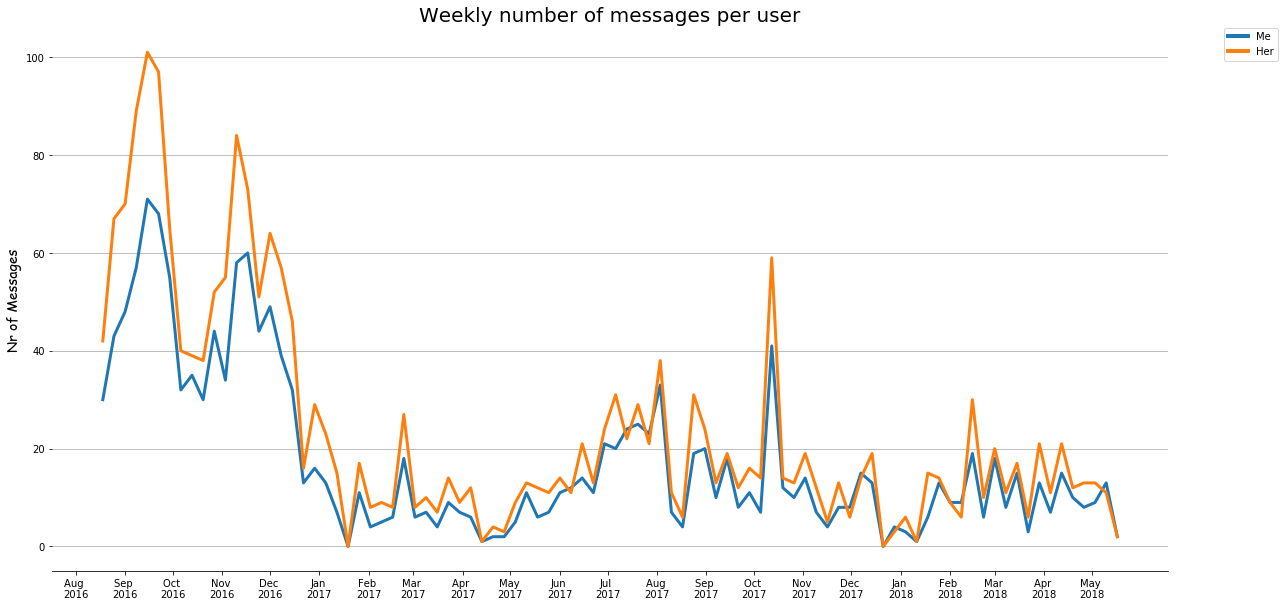

In [5]:
general.plot_messages(df, colors=None, trendline=False, savefig=False, dpi=100)

#### <a name="gs-active">2.4 Active Moments</a> 
[Back to Table of Contents](#table)

**Daily Activity**  
This shows the daily activity per person in a spider plot and in total in a histogram. 
NOTE: This is unstandardized data, which means that it also shows the amount of messages. 

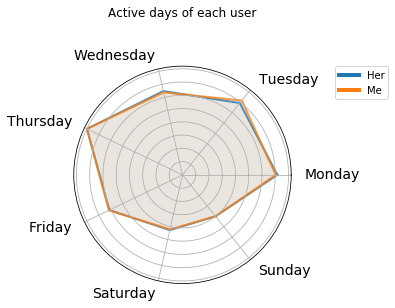

In [6]:
general.plot_day_spider(df, colors=None, savefig=False, dpi=100)

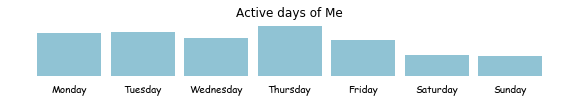

In [7]:
general.plot_active_days(df, savefig=False, dpi=100, user='Me')

**Hourly Activity**  
It shows which days are most active based on the period in which most messages are send. 

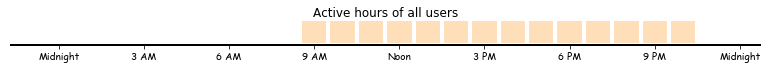

In [8]:
general.plot_active_hours(df, color='#ffdfba', savefig=False, dpi=100, user='All')

**Calendar Map**  
Here you can choose for which year you want to see the activity

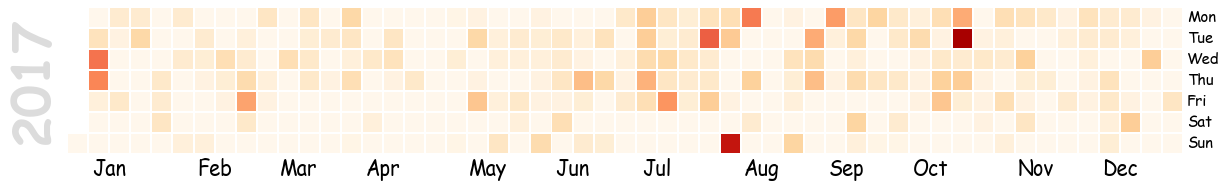

In [9]:
# Need to set the index and provide a single column
general.calendar_plot(df, year=2017, how='count', column='index')

#### <a name="gs-averages">2.5 Averages / Summaries</a> 
[Back to Table of Contents](#table)

Here you can find general averages and summaries. For those that are interested how often a person said "I love you", you can also find that. 

In [10]:
general.print_stats(df, love=True)

##########################
##  Number of Messages  ##
##########################

2191	Her
1616	Me

#######################
##  Number of Words  ##
#######################

24705	Her
30200	Me

#########################
##  Messages per hour  ##
#########################

Her:	0.14321197463886529
Me:	0.10560020910932497

################################
##  Avg nr Words per Message  ##
################################

Her: 11.28
Me: 18.69

#############################
##  Avg length of Message  ##
#############################

Her: 56.39
Me: 92.78

##############################
##  Highscore Day per User  ##
##############################

Her
Messages: 	30
Day: 		2016-09-25

Me
Messages: 	23
Day: 		2016-09-28

########################################
##  How often user said "I love you"  ##
########################################

Her:                          10
Me:                           7


#### <a name="gs-response">2.6 Response Time</a> 
[Back to Table of Contents](#table)

**keep_order = True** maintains the order of messages in the dataframe which is neccesary in order to calculate the response time between messages. However, it is more time-consuming which is why I created a separate function for this. 

In [11]:
# df.sort_values('Date', inplace=True)
general.print_timing(df)

#####################################
##  Avg. Response Time in Minutes  ##
#####################################

Me:                           37.82
Her:                          24.45

##############################
##  Nr. Initiated Messages  ##
##############################

Her:                          15		(0.68% of all messages)
Me:                           69		(4.27% of all messages)


## <a name="tfidf">3. TF-IDF</a> 
[Back to Table of Contents](#table)

#### <a name="tf-count">3.1 Create Count Vector</a> 
[Back to Table of Contents](#table)

It creates the dataframe "counts" which is a dataframe that contains each word that is said in all conversations and counts how often each user has said that word. 

In [12]:
counts = tf_idf.count_words_per_user(df,sentence_column="Message_Only_Text",
                                     user_column="User")
counts = tf_idf.remove_stopwords(counts, path = "", file ='stopwords_dutch.txt', column="Word")

#### <a name="tf-unique">3.2 Unique Words</a> 
[Back to Table of Contents](#table)

Below you can see three version of TF-IDF that I created. After much experimentation it turns out that they are all quite similar and that Version C gives me a nice distribution of values needed for the plotting. Content-wise they all have a very similar meaning. 

**Version A - Messages**  
  
$TFIDF_i = \frac{{t_{ij}+1}^2}{\sum_{i=1}^{n} t_j} \times \frac{\sum_{i=1}^{n} m_i}{m_i} $  
  
$t_{ij} = $ Number of times word $j$ said by $i$   
$m_i = $ Number of messages texted by $i$  
  

**Version B - Words**

$TFIDF_i = \frac{{t_{ij}+1}^2}{\sum_{i=1}^{n} t_j} \times \frac{\sum_{i=1}^{n} w_i}{w_i}$

$t_{ij} = $ Number of times a specific word $j$ was said by $i$  
$w_i = $ Number of words texted by $i$


**Version C - Adjusted TF-IDF**

$ TFIDF_i = \frac{{t_{ij} + 1}}{w_i + 1} \times \log{\frac{m}{\sum_{i=1}^{n} t_j}} $  
$w_i = $ Number of words texted by $i$  
$t_{ij} = $ Number of times a specific word $j$ was said by $i$  
$m = $ Number of all messages   

** Unique Words **  
  
$ Unique_i = \frac{TFIDF_i}{\sum\limits_{j, j \neq i}^n TFIDF_i} $


In [13]:
unique_words = tf_idf.get_unique_words(counts, df, version = 'C')

#### <a name="tf-image">3.3 Plot Image</a> 
[Back to Table of Contents](#table)

This is where things got a bit tricky...

I created a horizontal bar chart with two bars stacked on top of each other both plotted on a background image. I started with a background image and plotted the actual values on the left and made it fully transparent with a white border to separate the bars. Then, on top of that I plotted which bars so that the right part of the image would get removed. 

In [14]:
tf_idf.print_users(df)

#############
##  Users  ##
#############

Her
Me


**Instructions**  
Make sure to change "user" in the function below to one of the users as seen above. It needs to be the exact same naming otherwise it will not work. Furthermore, a valid picture needs to be selected. You can choose the sizing yourself which might need some experimenting with before finding the right size. It also works with a link to the image online. 

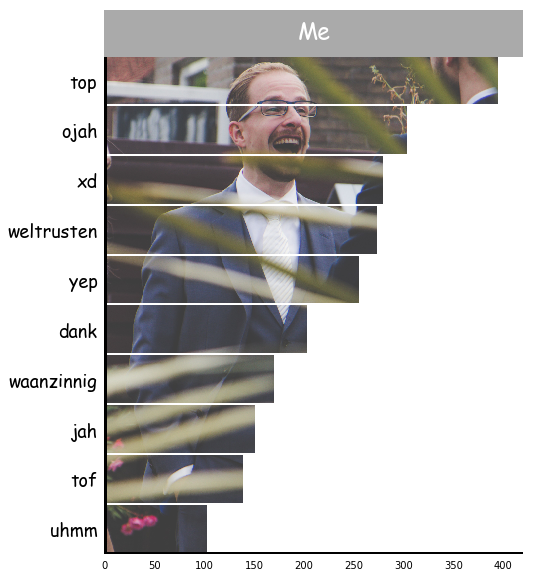

In [15]:
tf_idf.plot_unique_words(unique_words, user='Me', 
                         image_path='histogram.jpg', image_url=None, 
                         title="Me", title_color="white", 
                         title_background='#AAAAAA', width=400, height=500)

## <a name="emoji">4. Emoji Analysis</a> 
[Back to Table of Contents](#table)

These analysis are based on the Emojis used in each message. Below you can find the following:
* Unique Emoji per user
* Commonly used Emoji per user
* Highly correlated Emoji per user

#### <a name="emoji-prepare">4.1 Prepare Data</a> 
[Back to Table of Contents](#table)

The data needs to be prepared as follows:
* Three new columns are created:
    * *Emoji* contains all emojis in a message
    * *Emoji_Counts* counts the number of emojis in a message
    * *Different_Emojis* extracts them in a list for handling purposes
* *counts* is a dictionary of dictionaries containing the count of each emoji per user
* *unique_emoji* is a dict of dicts containing a uniqueness score of each emoji per user compared to other users

In [16]:
# https://github.com/pandas-dev/pandas/issues/17892
temp = df[['index', 'Message_Raw', 'User', 'Message_Clean', 'Message_Only_Text']].copy()
temp = emoji.prepare_data(temp)

# Count all emojis
counts = emoji.count_emojis(temp, non_unicode=True)

# Get unique emojis
list_of_words = [word for user in counts for word in counts[user]]
unique_emoji = emoji.get_unique_emojis(temp, counts, list_of_words)
del temp

#### <a name="emoji-stats">4.2 Unique and Common Emoji</a> 
[Back to Table of Contents](#table)

Below you can find the most unique emojis according to the TF-IDF and Unique formulas that were used previously: 

** TF-IDF **

$ TFIDF_i = \frac{{t_{ij} + 1}}{w_i + 1} \times \log{\frac{m}{\sum_{i=1}^{n} t_j}} $  
$w_i = $ Number of words texted by $i$  
$t_{ij} = $ Number of times a specific emoji $j$ was said by $i$  
$m = $ Number of all messages  

** Unique Emoji **  
  
$ Unique_i = \frac{TFIDF_i}{\sum\limits_{j, j \neq i}^n TFIDF_i} $

I purposefully based it on the number of words and messages in total and only changed *t* to the number of times emoji was said

In [17]:
emoji.print_stats(unique_emoji, counts)

#############################
### Unique Emoji (TF-IDF) ###
#############################

Me
:P 177.583178726
:) 109.803339518
😃 20.3339517625

Her
😬 33.1957116788
☹ 19.9174270073
😭 14.753649635

#########################
### Most Common Emoji ###
#########################

Me
😊 454
😚 146
:P 130

Her
😊 618
😚 290
😉 160



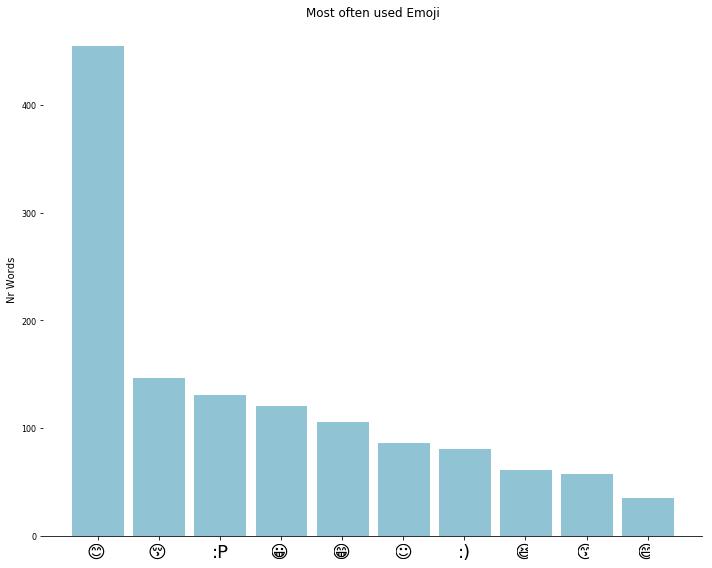

In [18]:
emoji.plot_counts(counts, user = 'Me')

#### <a name="emoji-corr">4.3 Correlation Matrix</a> 
[Back to Table of Contents](#table)

Below you find a correlation matrix of the 15 most often used emoji by a single user. The reasoning for only taking 15 emojis is that otherwise the matrix simply becomes too big. 

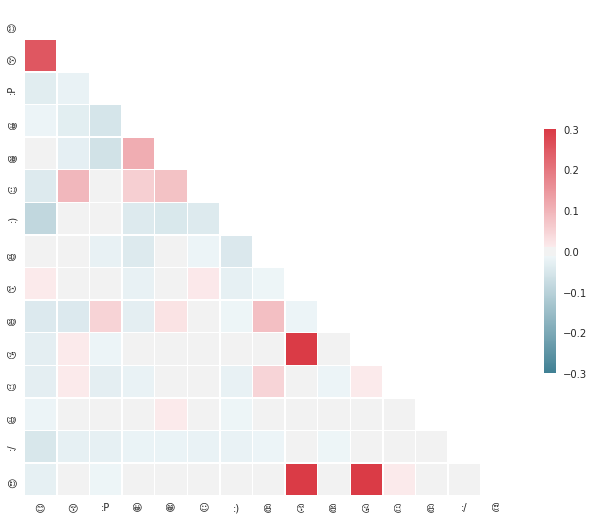

In [19]:
emoji.plot_corr_matrix(df, 'Me', list_of_words, counts)

## <a name="topic">5. Topic Modelling</a> 
[Back to Table of Contents](#table)

#### <a name="topic-prepare">5.1 Prepare Data</a> 
[Back to Table of Contents](#table)

The data is prepared as follows:
The *pattern* is used as that is one of the few (sort of) working Dutch NLP-processors for python. There is generally little available with regards to Dutch processors. Since I want to extract topics translating text did not seem like the right way to go. So, using *pattern* I used the following functions where necessary:
* Lemmatization
* Singularize
* Predicative

Unfortunately, stemming was not an option since the Snowball stemmer from NLTK makes too many mistakes to be used. 

*NOTE*: These analyses are for the purpose of getting insights into whatsapp data. I did not spend much time optimizing algorithms for the simple reason that they already give good results out-of-the-box. Moreover, optimizing my results is likely not generalizable to your data as you are quick to overfit with such limited data.

*NOTE2*: # Make sure to download the version for python 3+:
* https://github.com/clips/pattern/tree/development
* git clone -b development https://github.com/clips/pattern
* cd pattern
* python setup.py install

In [20]:
df['Message_Prepared'] = df.apply(lambda row: topic.prepare_text_nl(row), 1)

#### <a name="topic-lda">5.2 LDA </a> 
[Back to Table of Contents](#table)

There is an abundance of methods with regards to topic modelling. Two, however, seem to be the most used: LDA and NMF. Sklearn has an implementation of both LDA and NMF which is why I used that. It should be noted that Gensim is also an extremely good package when it comes to NLP. I will be using Gensim later below for a different application. 

In [21]:
topic.topics(df, model='lda', stopwords='stopwords_dutch.txt')

###########
### Her ###
###########


Topics in lda model:
Topic #0: mee he jammer plezier vragen hopen houden
Topic #1: dankjewel schatje lief natuurlijk love wachten vnvd
Topic #2: gaan oke lekker morgen fijn thuis wijten
Topic #3: leuk halen mooi boodschap goed schatten oh
Topic #4: goed komen vinden vanavond gezellig kijken succes

##########
### Me ###
##########


Topics in lda model:
Topic #0: goed helemaal haha gaten hoor komen nou
Topic #1: goed leuk super zien vinden gaan haha
Topic #2: gaan lieverden lekker fijn nodig boodschap morgen
Topic #3: gaan halen gezellig gaten terug goed loi
Topic #4: thuis uur hey lieverden half morgen lekker



#### <a name="topic-nmf">5.3 NMF </a> 
[Back to Table of Contents](#table)

An application of the NMF model used for topic modelling. 

In [22]:
topic.topics(df, model='nmf', stopwords='stopwords_dutch.txt')

###########
### Her ###
###########


Topics in nmf model:
Topic #0: oke oh schatje halen straks fijn schattie
Topic #1: gaan lekker fijn thuis straks hey morgen
Topic #2: dankjewel lieverden succes uni fijn morgen slaap
Topic #3: goed komen wijten wauw fijn ouder bezig
Topic #4: hoor hoeven prima eten echt uur natuurlijk

##########
### Me ###
##########


Topics in nmf model:
Topic #0: goed haha leuk komen helemaal vinden super
Topic #1: boodschap nodig gaan ga half uurtje straks
Topic #2: thuis uur half verwachten uurtje hey laten
Topic #3: lekker morgen slaap fijn weltrust zien bed
Topic #4: lieverden dank hey fijn verwachten halen sorry



## <a name="sentiment">6. Sentiment</a> 
[Back to Table of Contents](#table)

#### <a name="sentiment-prepare">6.1 Prepare Data</a> 
[Back to Table of Contents](#table)

Fortunately, in order to extract sentiment from a Dutch message you can extract the score (-1 being negative and 1 being positive) easily using the pattern package. Below I extract the sentiment as a new column which is needed for further analysis. 

In [23]:
from pattern.nl import sentiment  as sentiment_nl
df['Sentiment'] = df.apply(lambda row: sentiment_nl(row.Message_Clean)[0], 1)

#### <a name="sentiment-average">6.2 Average Sentiment Per User</a> 
[Back to Table of Contents](#table)

Prints the average sentiment per user to get an indication of positivity of that user. 

*NOTE*: THIS ONLY WORKS FOR DUTCH!

In [24]:
sentiment.print_avg_sentiment(df)

			#######################
			## Average Sentiment ##
			#######################
Her:                          		0.291
Me:                           		0.329





#### <a name="sentiment-plot">6.3 Plot Sentiment</a> 
[Back to Table of Contents](#table)

Below you can see a plot of how positive the messages are over time. The y-axis works as follows, a happy smiley indicates a score of 1 (max value) meaning a positive message and a sad smiley indicates a score of -1 (min value) meaning a negative message. 

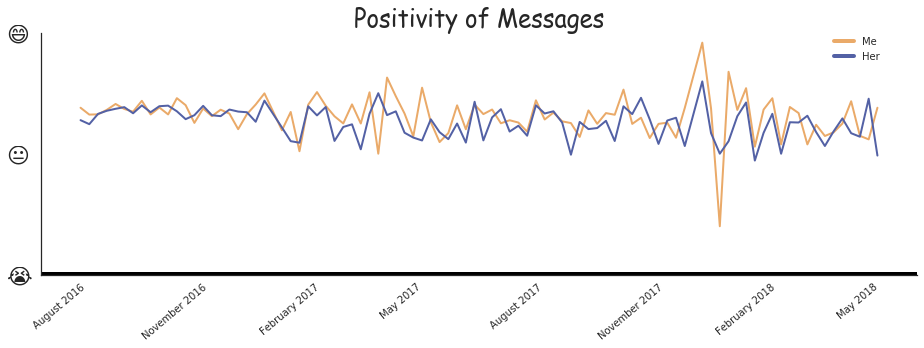

In [26]:
sentiment.plot_sentiment(df, colors=['#EAAA69','#5361A5'], savefig=False)

## <a name="cloud">7. Word Clouds</a> 
[Back to Table of Contents](#table)

#### <a name="cloud-prepare">7.1 Prepare Data</a> 
[Back to Table of Contents](#table)

In [27]:
# Counts words and create dictionary of words with counts
counts = tf_idf.count_words_per_user(df,sentence_column="Message_Only_Text",user_column="User")
counts = tf_idf.remove_stopwords(counts, path = "", file ='stopwords_dutch.txt', column="Word")

#### <a name="cloud-mask">7.2 Masked Word Cloud</a> 
[Back to Table of Contents](#table)

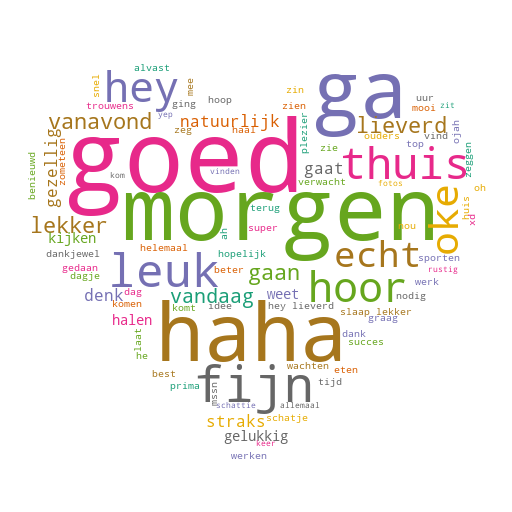

In [28]:
wordcloud.create_wordcloud(df.Message_Only_Text, mask = 'mask.jpg', 
                           stopwords='stopwords_dutch.txt', random_state=42, 
                           max_words=1000, max_font_size=50, scale=2, 
                           normalize_plurals=False, relative_scaling = 0.5)

#### <a name="cloud-sentiment">7.3 Sentiment-based Word Cloud</a> 
[Back to Table of Contents](#table)

*NOTE*: ONLY WORKS FOR DUTCH

In [29]:
# Choose which user you want to see the word cloud for
positive, negative = wordcloud.extract_sentiment_count(counts, user = "Me")

##### Positive Words

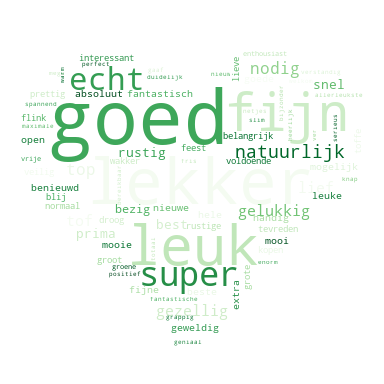

In [30]:
wordcloud.create_wordcloud(data=positive, cmap='Greens', mask='mask.jpg', 
                    stopwords='stopwords_dutch.txt', random_state=42, max_words=1000, 
                    max_font_size=50, scale=1.5, normalize_plurals=False, relative_scaling=0.5)

##### Negative Words

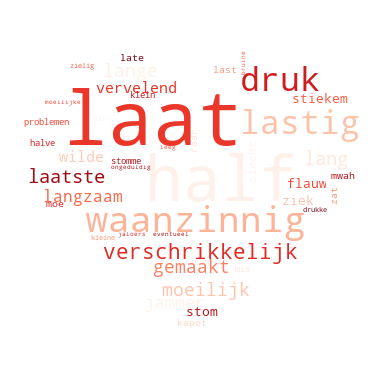

In [31]:
wordcloud.create_wordcloud(data=negative, cmap='Reds', mask='mask.jpg', 
                    stopwords='stopwords_dutch.txt', random_state=42, max_words=1000, 
                    max_font_size=50, scale=1.5, normalize_plurals=False, relative_scaling=0.5)

## <a name="color">8. Picture Analysis</a> 
[Back to Table of Contents](#table)

NOTE: This is not part of the whatsapp data. For this chapter to work, you'll need to put at least 1 image in the folder 'Images/' or create a path of your own. It is set to not run automatically since this is merely an extra feature. Set run_colors to True if you want to run the script. 

#### <a name="color-get">8.1 Extract Frequent Colors (k-Means)</a> 
[Back to Table of Contents](#table)

In [32]:
import os
import pickle

Below is the code to retrieve and dump the top 5 most frequent colors in an image using k-Means. 
It works as follows, each pixel in an image has its own color. That color of each pixel in an image is then extracted in an rgb format. This allows each pixel to have an x (r), y (g) and z (b) coordinate. After extracting all colors of each pixel, k-Means (with k=5) is then used to cluster the points into 5 colors. For each cluster the mediod is calculated and used as a representative of that cluster. Thus, you get top 5 colors for each image. 

In [33]:
extract_colors = False

if extract_colors:
    # Get Top 5 Frequent Colors
    path = 'Images/'
    all_colors = [colors.get_common_colors(path + i) for i in os.listdir(path)]

    # Save colors
    with open('colors.pkl', 'wb') as f:
        pickle.dump(all_colors, f)

#### <a name="color-plot">8.2 Plot Frequent Colors</a> 
[Back to Table of Contents](#table)

After getting the top 5 colors for each picture, they are counted and then displayed below in a histogram. The histogram is in a circular shape where larger/bigger/higher bars indicate colors that are more frequent in the set of pictures. There is a version of the histogram that only shows bars and one that shows a smoothened histogram to be more visually pleasing. 

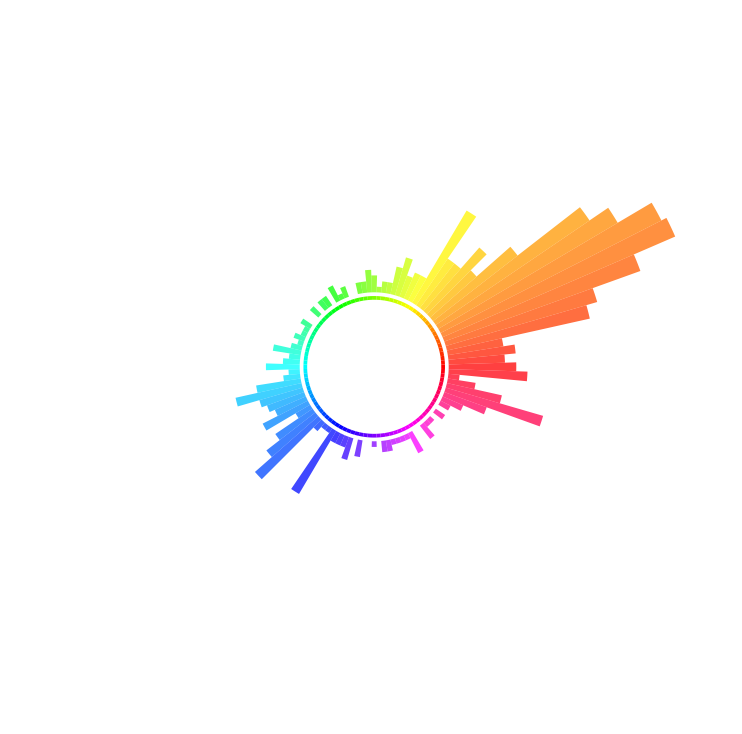

In [34]:
colors.plot_color('colors.pkl', smoothen=False, savefig=False)

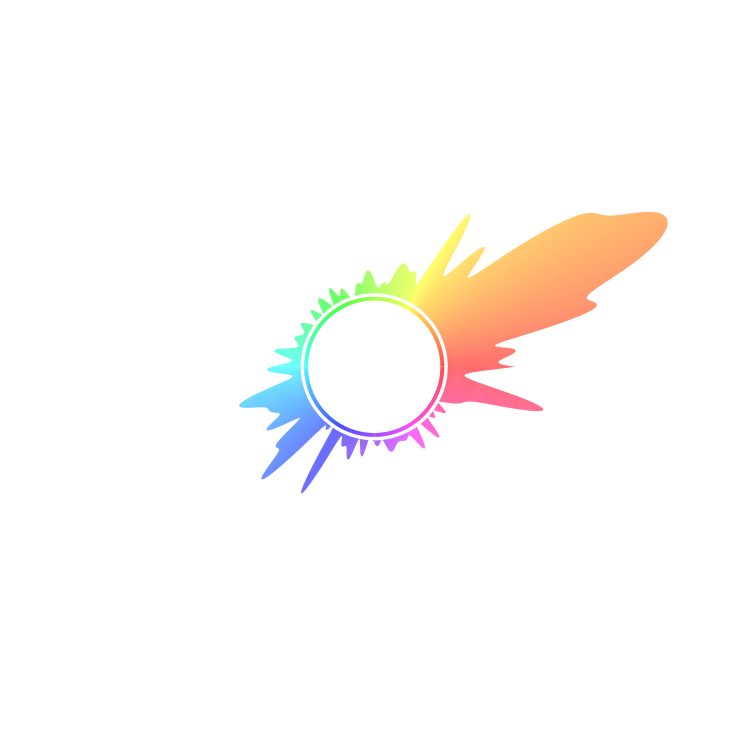

In [35]:
colors.plot_color('colors.pkl', smoothen=True, savefig=False)